In [ ]:
import pandas as pd
import nltk

In [ ]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [ ]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.drop(columns={'Unnamed: 2', 'Unnamed: 3','Unnamed: 4',}, inplace=True)

In [ ]:
df.rename(columns={'v1': 'class', 'v2': 'sms'}, inplace=True)
df.sample(5)

,class,sms
2099,spam,"SMS SERVICES. for your inclusive text credits,..."
3196,ham,So its to be poking man everyday that they tea...
2342,spam,Double your mins & txts on Orange or 1/2 price...
3188,ham,X2 &lt;#&gt; . Are you going to get that
5174,ham,Water logging in desert. Geoenvironmental impl...


In [ ]:
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4516   4516  Go until jurong point, crazy.. Available only ...    1
spam    653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

In [ ]:
df['Length'] = df['sms'].apply(len)

In [ ]:
df.head(2)

,class,sms,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f91b16f1cd0>,
      dtype=object)

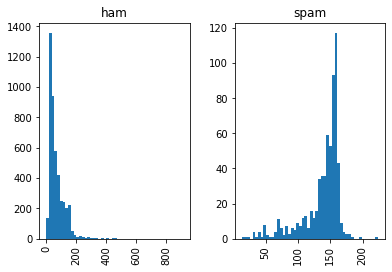

In [ ]:
df.hist(column='Length',by='class', bins=50)

In [ ]:
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('punkt')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df.head(5)

,class,sms,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
import string

def clean_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
df['sms_cleaned'] = df['sms'].apply(clean_text)

In [ ]:
df.head(5)

,class,sms,Length,sms_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",111,go
1,ham,Ok lar... Joking wif u oni...,29,ok
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free
3,ham,U dun say so early hor... U c already then say...,49,u
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_vec = TfidfVectorizer(max_features=3000)
X = tf_vec.fit_transform(df['sms_cleaned']).toarray()

AttributeError: ignored

In [ ]:
X.shape

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

NameError: ignored

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train,y_train)

NameError: ignored

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))

NameError: ignored